This script takes a folder with a series of scored responses from different LLMs and runs a round robin competition between different LLMs to determine their empirical win rate. Graphs empirical win rate vs elo expected win rate for each RM. Here calculated for three different RMs.

In [ ]:
import os
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Fill in with path to data that will be compared
folder_path = "/content/drive/MyDrive/RL_Final_Project/Responses_100/"
# Fill in with elos of the models for comparison
elos = []

Empirical Win Rate Calculation: InternLM

In [ ]:
full_data = {} # {Prompt: {LLM: score, LLM: score}}
LLMs = {} # LLM: [wins, games]
labels = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)
    for prompt, score in zip(df['prompt'], df['score_internlm/internlm2-1_8b-reward']):
      if prompt not in full_data:
        full_data[prompt] = {}
      if filename not in full_data[prompt]:
        full_data[prompt][filename] = score
    if filename not in LLMs:
      LLMs[filename] = [0, 0]
      labels.append(filename)

for prompt, scores in full_data.items():
  for llm1, llm2 in combinations(scores.keys(), 2):
        score1 = scores[llm1]
        score2 = scores[llm2]
        if score1 > score2:
            LLMs[llm1][0] += 1
        elif score2 > score1:
            LLMs[llm2][0] += 1
        # Draws are ignored in win counts but still increment total comparisons
        LLMs[llm1][1] += 1
        LLMs[llm2][1] += 1

Win_Rate = {}
win_rates = []
for llm in LLMs.keys():
  win = LLMs[llm][0] / LLMs[llm][1]
  print(f"Win Rate: {llm}: {win}")
  Win_Rate[llm] = win
  win_rates.append(win)

print(win_rates)

Win Rate: Llama-3.1-Tulu-3-8B-SFT_1000.csv: 0.43004012036108324
Win Rate: Llama-3.2-1B-Instruct_1000.csv: 0.3834002006018054
Win Rate: gemma-2-9b-it_1000.csv: 0.6584754262788365
Win Rate: gemma-2b-it_1000.csv: 0.5925275827482447
Win Rate: Phi-3-mini-4k-instruct_1000.csv: 0.4222668004012036
[0.43004012036108324, 0.3834002006018054, 0.6584754262788365, 0.5925275827482447, 0.4222668004012036]


In [ ]:
expected_wins = []
for elo in elos:
  wins = 0
  total = 0
  for opponent in elos:
    if elo == opponent:
      continue
    expected_win = 1 / (1 + 10 ** ((elo - opponent) / 400))
    wins += expected_win
    total += 1
  expected_wins.append(wins / total)

<Figure size 1000x1000 with 0 Axes>

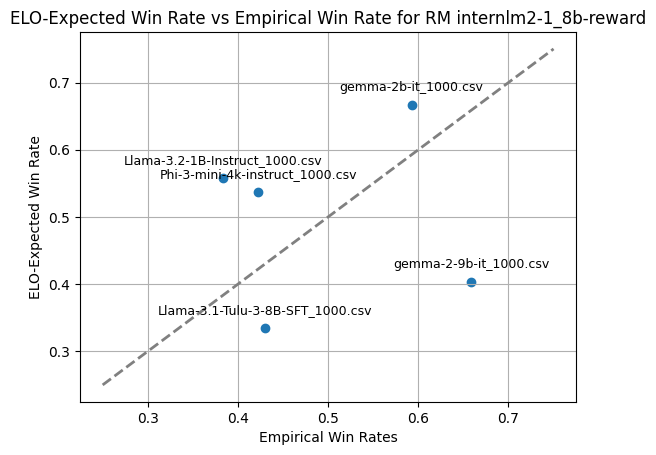

In [ ]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
ax.scatter(win_rates, expected_wins)
plt.plot([0.25,0.75],[0.25,0.75], '--', lw=2, color='gray')

for xi, yi, label in zip(win_rates, expected_wins, labels):
    ax.annotate(
        label,
        (xi, yi),
        textcoords="offset points", 
        xytext=(0, 10),             
        ha='center',                
        fontsize=9
    )

ax.set_xlabel("Empirical Win Rates")
ax.set_ylabel("ELO-Expected Win Rate")
ax.set_title("ELO-Expected Win Rate vs Empirical Win Rate for RM internlm2-1_8b-reward")
plt.grid(True)
plt.show()

Same for Llama3-8B-rewardmodel-ft

In [ ]:
full_data = {} # {Prompt: {LLM: score, LLM: score}}
LLMs2 = {} # LLM: [wins, games]
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)
    for prompt, score in zip(df['prompt'], df['score_Ray2333/GRM-Llama3-8B-rewardmodel-ft']):
      if prompt not in full_data:
        full_data[prompt] = {}
      if filename not in full_data[prompt]:
        full_data[prompt][filename] = score
    if filename not in LLMs2:
      LLMs2[filename] = [0, 0]

for prompt, scores in full_data.items():
  for llm1, llm2 in combinations(scores.keys(), 2):
        score1 = scores[llm1]
        score2 = scores[llm2]
        if score1 > score2:
            LLMs2[llm1][0] += 1
        elif score2 > score1:
            LLMs2[llm2][0] += 1
        # Draws are ignored in win counts but still increment total comparisons
        LLMs2[llm1][1] += 1
        LLMs2[llm2][1] += 1

Win_Rate2 = {}
win_rates2 = []
for llm in LLMs2.keys():
  win = LLMs2[llm][0] / LLMs2[llm][1]
  print(f"Win Rate: {llm}: {win}")
  Win_Rate2[llm] = win
  win_rates2.append(win)

print(win_rates2)

Win Rate: Llama-3.1-Tulu-3-8B-SFT_1000.csv: 0.4932296890672016
Win Rate: Llama-3.2-1B-Instruct_1000.csv: 0.4012036108324975
Win Rate: gemma-2-9b-it_1000.csv: 0.6181043129388164
Win Rate: gemma-2b-it_1000.csv: 0.49949849548645936
Win Rate: Phi-3-mini-4k-instruct_1000.csv: 0.4699097291875627
[0.4932296890672016, 0.4012036108324975, 0.6181043129388164, 0.49949849548645936, 0.4699097291875627]


<Figure size 1000x1000 with 0 Axes>

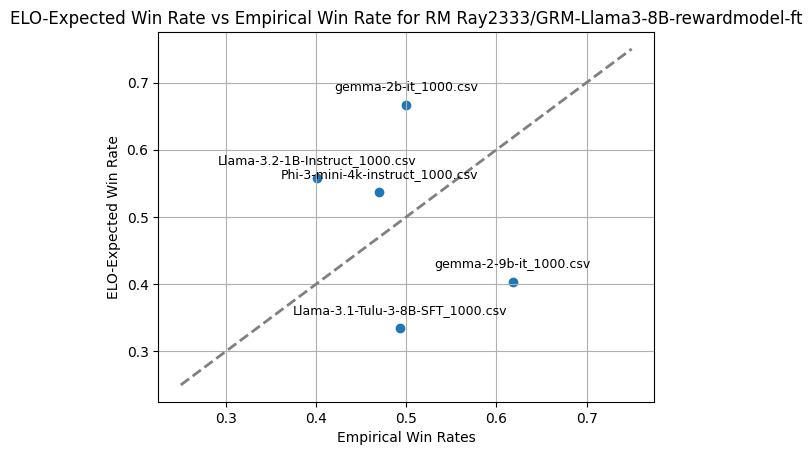

In [ ]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
ax.scatter(win_rates2, expected_wins)
plt.plot([0.25,0.75],[0.25,0.75], '--', lw=2, color='gray')
# Annotate each point
for xi, yi, label in zip(win_rates2, expected_wins, labels):
    ax.annotate(
        label,
        (xi, yi),
        textcoords="offset points", 
        xytext=(0, 10),             
        ha='center',                
        fontsize=9
    )

ax.set_xlabel("Empirical Win Rates")
ax.set_ylabel("ELO-Expected Win Rate")
ax.set_title("ELO-Expected Win Rate vs Empirical Win Rate for RM Ray2333/GRM-Llama3-8B-rewardmodel-ft")
plt.grid(True)
plt.show()

In [ ]:
full_data = {} # {Prompt: {LLM: score, LLM: score}}
LLMs3 = {} # LLM: [wins, games]
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if file_path == '/content/drive/MyDrive/Shared/RL_Final_Project/Responses_100/Starling-LM-7B-alpha_100.gsheet':
      continue
    df = pd.read_csv(file_path)
    for prompt, score in zip(df['prompt'], df['score_RLHFlow/ArmoRM-Llama3-8B-v0.1']):
      if prompt not in full_data:
        full_data[prompt] = {}
      if filename not in full_data[prompt]:
        full_data[prompt][filename] = score
    if filename not in LLMs3:
      LLMs3[filename] = [0, 0]

for prompt, scores in full_data.items():
  for llm1, llm2 in combinations(scores.keys(), 2):
        score1 = scores[llm1]
        score2 = scores[llm2]
        if score1 > score2:
            LLMs3[llm1][0] += 1
        elif score2 > score1:
            LLMs3[llm2][0] += 1
        # Draws are ignored in win counts but still increment total comparisons
        LLMs3[llm1][1] += 1
        LLMs3[llm2][1] += 1

Win_Rate3 = {}
win_rates3 = []
for llm in LLMs3.keys():
  win = LLMs3[llm][0] / LLMs3[llm][1]
  print(f"Win Rate: {llm}: {win}")
  Win_Rate3[llm] = win
  win_rates3.append(win)

print(win_rates3)

Win Rate: Llama-3.2-1B-Instruct_outputs_100.csv: 0.36875
Win Rate: gemma-2-9b-it_outputs_100.csv: 0.80375
Win Rate: aya-expanse-8b_outputs_100.csv: 0.42625
Win Rate: granite-3.1-8b-instruct_100.csv: 0.6275
Win Rate: Starling-LM-7B-alpha_100.csv: 0.4125
Win Rate: Phi-3-mini-4k-instruct_100.csv: 0.3925
Win Rate: Llama-3.1-Tulu-3-8B-SFT_100.csv: 0.31625
Win Rate: gemma-2-2b-it_100.csv: 0.62375
Win Rate: gemma-2b-it_100.csv: 0.47125
[0.36875, 0.80375, 0.42625, 0.6275, 0.4125, 0.3925, 0.31625, 0.62375, 0.47125]


<Figure size 1000x1000 with 0 Axes>

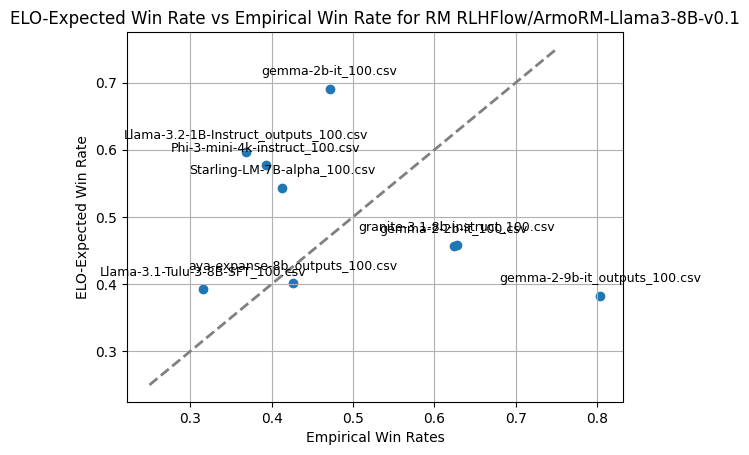

In [ ]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
ax.scatter(win_rates3, expected_wins)
plt.plot([0.25,0.75],[0.25,0.75], '--', lw=2, color='gray')
# Annotate each point
for xi, yi, label in zip(win_rates3, expected_wins, labels):
    ax.annotate(
        label,
        (xi, yi),
        textcoords="offset points", 
        xytext=(0, 10),            
        ha='center',               
        fontsize=9
    )

ax.set_xlabel("Empirical Win Rates")
ax.set_ylabel("ELO-Expected Win Rate")
ax.set_title("ELO-Expected Win Rate vs Empirical Win Rate for RM RLHFlow/ArmoRM-Llama3-8B-v0.1")
plt.grid(True)
plt.show()